<a href="https://colab.research.google.com/github/sainirajesh17/Seoul-Bike-Sharing-Demand-Prediction/blob/main/Bike_Sharing_Demand_Prediction_using_ML_Capstone_Project_II.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Seoul Bike Sharing Demand Prediction </u></b>

## <b> Problem Description </b>

### Currently Rental bikes are introduced in many urban cities for the enhancement of mobility comfort. It is important to make the rental bike available and accessible to the public at the right time as it lessens the waiting time. Eventually, providing the city with a stable supply of rental bikes becomes a major concern. The crucial part is the prediction of bike count required at each hour for the stable supply of rental bikes.


## <b> Data Description </b>

### <b> The dataset contains weather information (Temperature, Humidity, Windspeed, Visibility, Dewpoint, Solar radiation, Snowfall, Rainfall), the number of bikes rented per hour and date information.</b>


### <b>Attribute Information: </b>

### Date : year-month-day
### Rented Bike count - Count of bikes rented at each hour
### Hour - Hour of he day
### Temperature-Temperature in Celsius
### Humidity - %
### Windspeed - m/s
### Visibility - 10m
### Dew point temperature - Celsius
### Solar radiation - MJ/m2
### Rainfall - mm
### Snowfall - cm
### Seasons - Winter, Spring, Summer, Autumn
### Holiday - Holiday/No holiday
### Functional Day - NoFunc(Non Functional Hours), Fun(Functional hours)

# <b> Loading the dataset </b> #

In [ ]:
# Importing necessary libraries

import pandas as pd
import numpy as np

# For data visualization

import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Mounting drive to load data

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Loading the dataset

df = pd.read_csv('/content/drive/MyDrive/Supervised ML bike sharing demand Prediction/SeoulBikeData.csv',encoding = 'latin')


# <b> Preprocessing the Data </b> 

In [ ]:
# Checking the first 5 rows of the dataset

df.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [ ]:
# Checking the last 5 rows of the dataset

df.tail()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
8755,30/11/2018,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes
8756,30/11/2018,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8757,30/11/2018,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8758,30/11/2018,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes
8759,30/11/2018,584,23,1.9,43,1.3,1909,-9.3,0.0,0.0,0.0,Autumn,No Holiday,Yes


In [ ]:
# List of columns of the dataset 

df.columns

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day'],
      dtype='object')

In [ ]:
# Checking the Datatype of the columns.

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

In [ ]:
# Checking the Statistical info 

df.describe().T

,count,mean,std,min,25%,50%,75%,max
Rented Bike Count,8760.0,704.602055,644.997468,0.0,191.00,504.50,1065.25,3556.00
Hour,8760.0,11.500000,6.922582,0.0,5.75,11.50,17.25,23.00
Temperature(°C),8760.0,12.882922,11.944825,-17.8,3.50,13.70,22.50,39.40
Humidity(%),8760.0,58.226256,20.362413,0.0,42.00,57.00,74.00,98.00
Wind speed (m/s),8760.0,1.724909,1.036300,0.0,0.90,1.50,2.30,7.40
Visibility (10m),8760.0,1436.825799,608.298712,27.0,940.00,1698.00,2000.00,2000.00
Dew point temperature(°C),8760.0,4.073813,13.060369,-30.6,-4.70,5.10,14.80,27.20
Solar Radiation (MJ/m2),8760.0,0.569111,0.868746,0.0,0.00,0.01,0.93,3.52
Rainfall(mm),8760.0,0.148687,1.128193,0.0,0.00,0.00,0.00,35.00
Snowfall (cm),8760.0,0.075068,0.436746,0.0,0.00,0.00,0.00,8.80


In [ ]:
# Check the shape of dataset

df.shape

(8760, 14)

In [ ]:
# Checking null values of data 

df.isna().sum()

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64

In [ ]:
# Checking duplicate

df.duplicated().sum()

0

# <b> Exploratary data analysis </b>

In [ ]:
# Converting the Date column in Datetime Dtype as it is in object Dtype

df['Date']=pd.to_datetime(df['Date'])

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Date                       8760 non-null   datetime64[ns]
 1   Rented Bike Count          8760 non-null   int64         
 2   Hour                       8760 non-null   int64         
 3   Temperature(°C)            8760 non-null   float64       
 4   Humidity(%)                8760 non-null   int64         
 5   Wind speed (m/s)           8760 non-null   float64       
 6   Visibility (10m)           8760 non-null   int64         
 7   Dew point temperature(°C)  8760 non-null   float64       
 8   Solar Radiation (MJ/m2)    8760 non-null   float64       
 9   Rainfall(mm)               8760 non-null   float64       
 10  Snowfall (cm)              8760 non-null   float64       
 11  Seasons                    8760 non-null   object        
 12  Holida

In [ ]:
# Printing the list of all the numerical features in our dataframe.

numeric_features= df.select_dtypes(exclude='object')

# features = df.columns
# print(features)

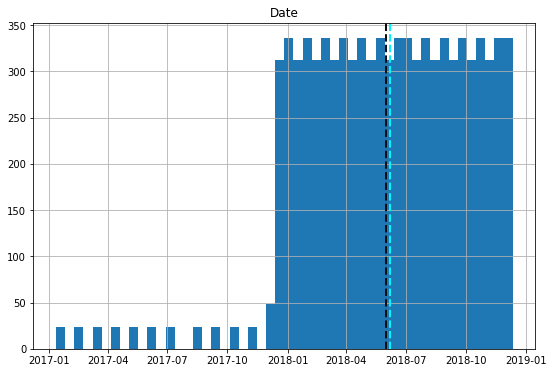

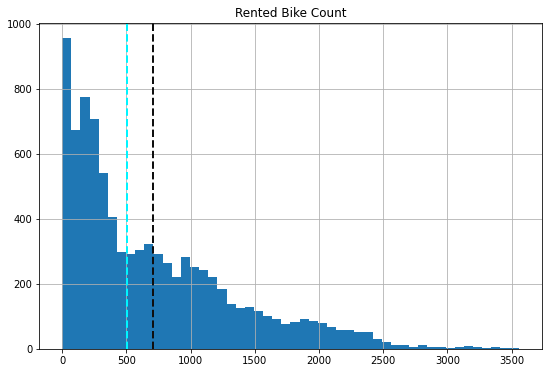

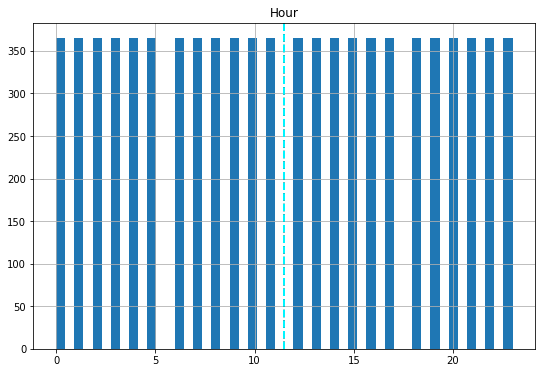

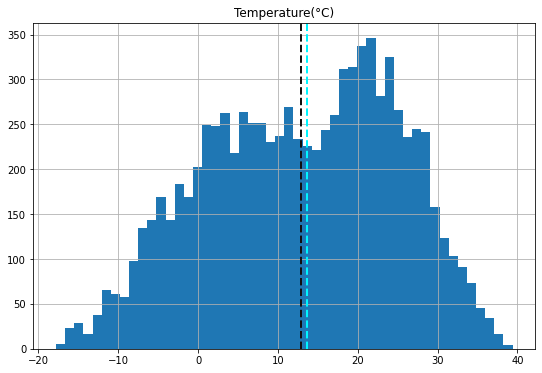

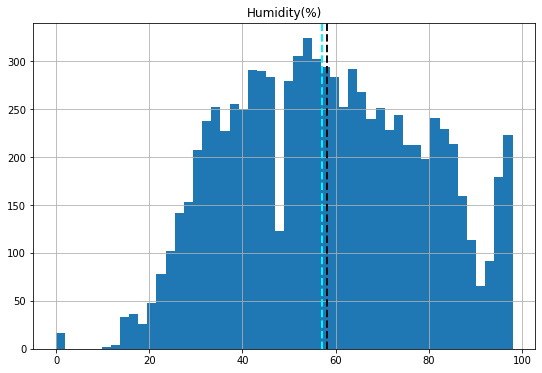

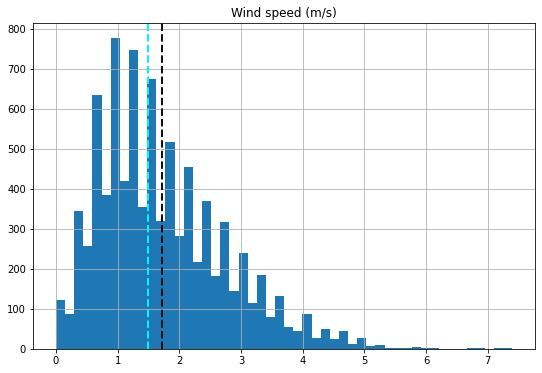

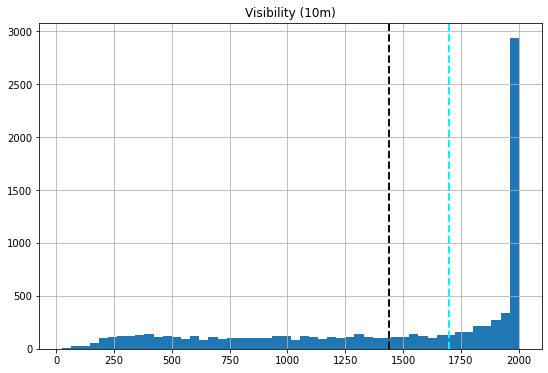

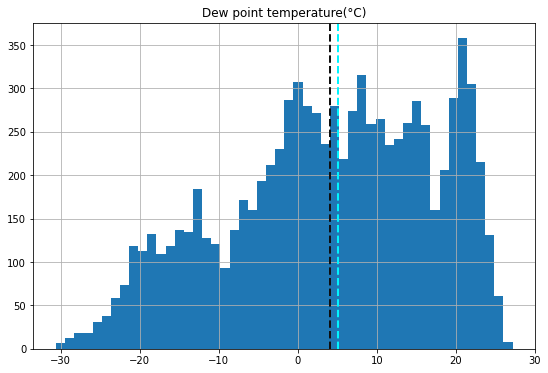

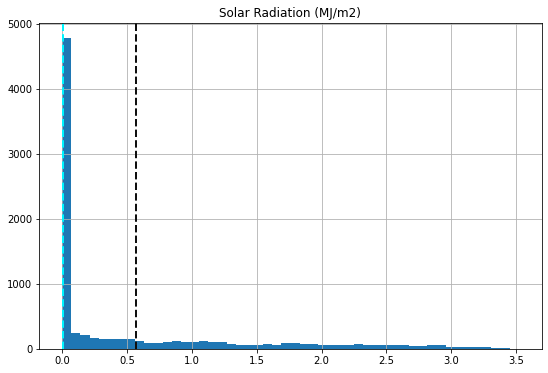

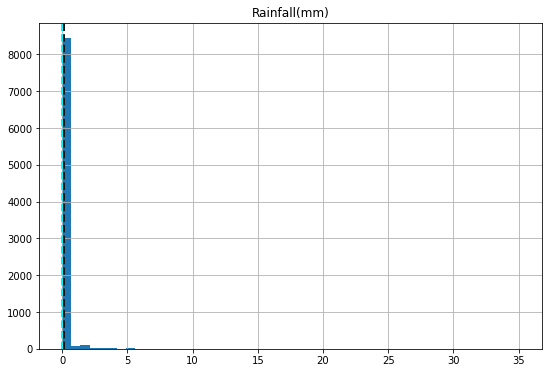

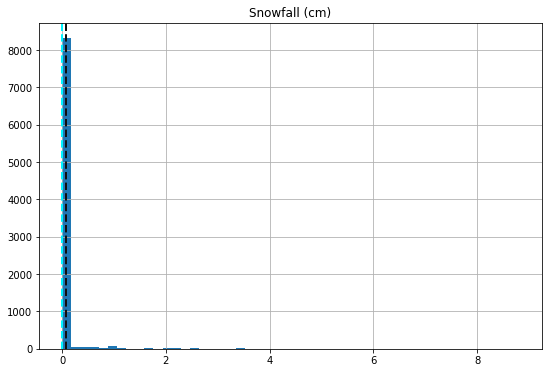

In [ ]:
# plotting histogram of all the features of the dataset for bivariate analysis.

for col in numeric_features:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    feature = df[col]
    feature.hist(bins=50, ax = ax)
    ax.axvline(feature.mean(), color='#0F0F0F', linestyle='dashed', linewidth=2)
    ax.axvline(feature.median(), color='#00F5FF', linestyle='dashed', linewidth=2)    
    ax.set_title(col)
plt.show()

## <b> Checking Multicollinearity </b>

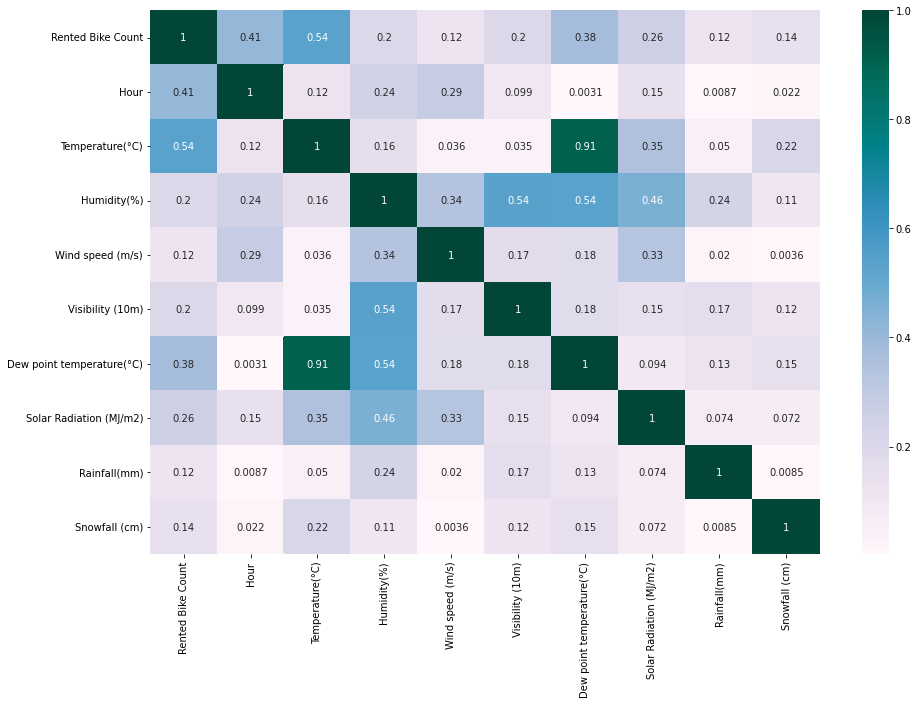

In [ ]:
# using correlation graph to check multicollinearity

plt.figure(figsize=(15,10))
sns.heatmap(abs(df.corr()), cmap= 'PuBuGn', annot=True)

In [ ]:
# As we can see from the above correlation matrix that the columns Dew point temperature(°C) and Temperature(°C) are highly correlated.
# which leads to multicollinearity so we will drop the Dew point temperature(°C) column from our dataframe.

df = df.drop(['Dew point temperature(°C)'],axis=1)

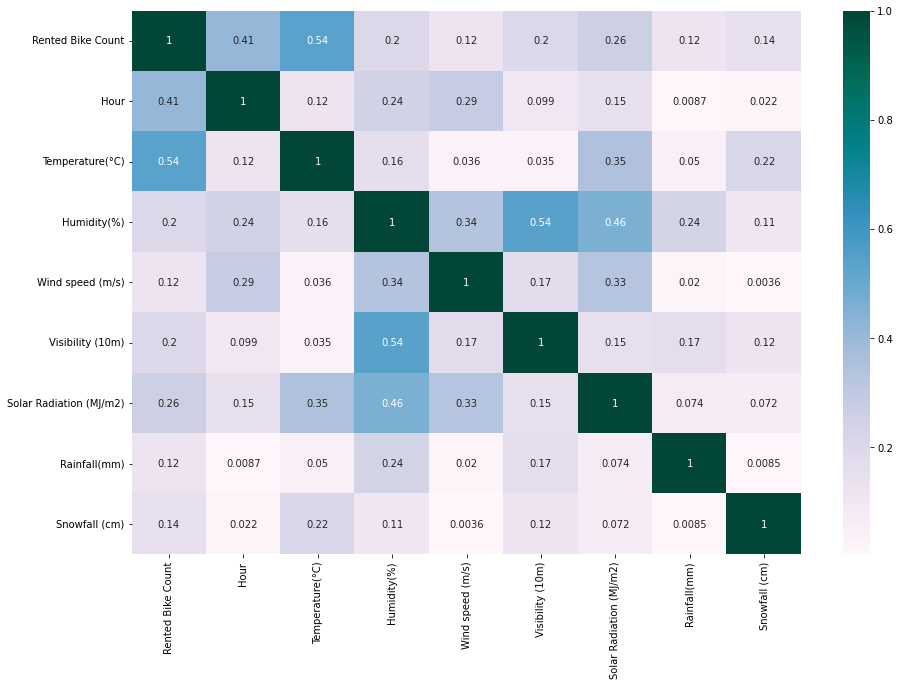

In [ ]:
# Check multicollinearity after removing the Dew point temperature(°C) column from our dataframe.

plt.figure(figsize=(15,10))
sns.heatmap(abs(df.corr()), cmap= 'PuBuGn', annot=True)

## <b> Feature Engineering

In [ ]:
# Checking the value count of the Seasons column.

df.Seasons.value_counts()

Spring    2208
Summer    2208
Autumn    2184
Winter    2160
Name: Seasons, dtype: int64

In [ ]:
# Checking the value count of the Holiday column.

df.Holiday.value_counts()

No Holiday    8328
Holiday        432
Name: Holiday, dtype: int64

In [ ]:
# Checking the value count of the Functioning Day column.

df['Functioning Day'].value_counts()

Yes    8465
No      295
Name: Functioning Day, dtype: int64

In [ ]:
# Converting categorical variable to numeric variable for ease in prediction by using map function.

df['IsHoliday']=df['Holiday'].map({'No Holiday':0,'Holiday':1})
df['Functioning_Day']=df['Functioning Day'].map({'Yes':1,'No':0})


In [ ]:
df.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,IsHoliday,Functioning_Day
0,2017-01-12,254,0,-5.2,37,2.2,2000,0.0,0.0,0.0,Winter,No Holiday,Yes,0,1
1,2017-01-12,204,1,-5.5,38,0.8,2000,0.0,0.0,0.0,Winter,No Holiday,Yes,0,1
2,2017-01-12,173,2,-6.0,39,1.0,2000,0.0,0.0,0.0,Winter,No Holiday,Yes,0,1
3,2017-01-12,107,3,-6.2,40,0.9,2000,0.0,0.0,0.0,Winter,No Holiday,Yes,0,1
4,2017-01-12,78,4,-6.0,36,2.3,2000,0.0,0.0,0.0,Winter,No Holiday,Yes,0,1


In [ ]:
# Encode categorical features
# The categorical features must be encoded to ensure that the models can interpret them. 
# One-hot encoding is used since none of the categorical features are ordinal.

seasons= pd.get_dummies(df.Seasons)
seasons

,Autumn,Spring,Summer,Winter
0,0,0,0,1
1,0,0,0,1
2,0,0,0,1
3,0,0,0,1
4,0,0,0,1
...,...,...,...,...
8755,1,0,0,0
8756,1,0,0,0
8757,1,0,0,0
8758,1,0,0,0


In [ ]:
# Concatenating the dataframe with the dummy dataset of seasons column.
  
df = pd.concat( [df, seasons], axis = 1)

In [ ]:
df.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,IsHoliday,Functioning_Day,Autumn,Spring,Summer,Winter
0,2017-01-12,254,0,-5.2,37,2.2,2000,0.0,0.0,0.0,Winter,No Holiday,Yes,0,1,0,0,0,1
1,2017-01-12,204,1,-5.5,38,0.8,2000,0.0,0.0,0.0,Winter,No Holiday,Yes,0,1,0,0,0,1
2,2017-01-12,173,2,-6.0,39,1.0,2000,0.0,0.0,0.0,Winter,No Holiday,Yes,0,1,0,0,0,1
3,2017-01-12,107,3,-6.2,40,0.9,2000,0.0,0.0,0.0,Winter,No Holiday,Yes,0,1,0,0,0,1
4,2017-01-12,78,4,-6.0,36,2.3,2000,0.0,0.0,0.0,Winter,No Holiday,Yes,0,1,0,0,0,1


In [ ]:
# After Conversion of variable to numerical droping the original columns to avoid ambiguity.

df = df.drop(['Functioning Day','Holiday','Seasons'],axis=1)

In [ ]:
df.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),IsHoliday,Functioning_Day,Autumn,Spring,Summer,Winter
0,2017-01-12,254,0,-5.2,37,2.2,2000,0.0,0.0,0.0,0,1,0,0,0,1
1,2017-01-12,204,1,-5.5,38,0.8,2000,0.0,0.0,0.0,0,1,0,0,0,1
2,2017-01-12,173,2,-6.0,39,1.0,2000,0.0,0.0,0.0,0,1,0,0,0,1
3,2017-01-12,107,3,-6.2,40,0.9,2000,0.0,0.0,0.0,0,1,0,0,0,1
4,2017-01-12,78,4,-6.0,36,2.3,2000,0.0,0.0,0.0,0,1,0,0,0,1


## <b> Outlier Detection </b>

In [ ]:
numeric_features= df.select_dtypes(exclude='object')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Square root')

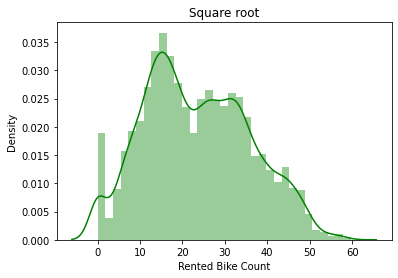

In [ ]:
sns.distplot(np.sqrt(df['Rented Bike Count']), color='green').set_title("Square root")


## <b> Splitting the data in Train and Test. </b>

In [ ]:
# Importing necessary Libraries.

from sklearn.model_selection import train_test_split

In [ ]:
# Dividing the data in training and test dataset.

X = df.drop(columns='Rented Bike Count')
y = np.sqrt(df['Rented Bike Count'])

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.20,random_state=42)

In [ ]:
X_train.head()


,Date,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),IsHoliday,Functioning_Day,Autumn,Spring,Summer,Winter
8415,2018-11-16,15,13.2,61,3.9,719,1.03,0.0,0.0,0,1,1,0,0,0
5049,2018-06-29,9,22.9,86,1.7,538,0.76,0.0,0.0,0,1,0,0,1,0
8395,2018-11-15,19,11.2,46,1.4,869,0.00,0.0,0.0,0,1,1,0,0,0
1535,2018-02-02,23,-2.6,69,2.0,1434,0.00,0.0,0.0,0,1,0,0,0,1
5518,2018-07-18,22,27.2,73,1.5,1005,0.00,0.0,0.0,0,1,0,0,1,0


In [ ]:
X_test.head()


,Date,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),IsHoliday,Functioning_Day,Autumn,Spring,Summer,Winter
6056,2018-10-08,8,27.2,69,1.8,1999,0.70,0.0,0.0,0,1,0,0,1,0
5556,2018-07-20,12,32.6,51,2.1,800,3.21,0.0,0.0,0,1,0,0,1,0
5990,2018-07-08,14,34.0,50,1.2,1744,1.68,0.0,0.0,0,1,0,0,1,0
7674,2018-10-16,18,16.9,47,1.4,1637,0.11,0.0,0.0,0,1,1,0,0,0
3319,2018-04-18,7,6.4,51,1.0,1398,0.19,0.0,0.0,0,1,0,1,0,0


In [ ]:
y_train.head()


8415    31.543621
5049    34.568772
8395    38.052595
1535    13.341664
5518    44.497191
Name: Rented Bike Count, dtype: float64

In [ ]:
y_test.head()


6056    41.569219
5556    28.670542
5990    25.651511
7674    52.115257
3319    32.908965
Name: Rented Bike Count, dtype: float64

In [ ]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape


((7008, 15), (1752, 15), (7008,), (1752,))

## <b> Linear Regression Model </b>

In [ ]:
from scipy import stats
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
# from sklearn.linear_model import Lasso,Ridge
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
# from sklearn.preprocessing import PowerTransformer
# from sklearn.compose import ColumnTransformer

In [ ]:
# Fitting the model

# regression = LinearRegression()
# regression.fit(X_train,y_train)

In [ ]:
# regression.score(X_train,y_train)

In [ ]:
# reg_pred = regression.predict(X_test)


In [ ]:
# score_metrics(y_test,reg_pred)


In [ ]:
# regression.coef_


In [ ]:
# regression.intercept_